In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib # 日本語表示のためのライブラリ
from PIL import Image

In [ ]:
IMAGE_DIR = "../datas/Bokete_Dataset/boke_image"
CAPTION_DIR = "../datas/Bokete_Dataset/boke_caption"
with open("Generated_Bokes/all_bokes.json", "r") as f:
    all_bokes = json.load(f)

image_ids = list(set([int(B[0].split("_")[-1]) for B in all_bokes]))

In [ ]:
idx = np.random.choice(image_ids)

fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(Image.open(f"{IMAGE_DIR}/{idx}.jpg"))

print(idx)
with open(f"{CAPTION_DIR}/{idx}.json") as f:
    caption = json.load(f)["caption"]
print(caption)

for B in all_bokes:
    tmp = str(idx)
    if tmp in B[0][-len(tmp):]:
        print(B)

In [ ]:
with open("vote_results.csv", "r") as f:
    a = f.readlines()
print(len(a))

tmp_a = list()
for A in a:
    A = A.replace("FC,L5", "FCL5")
    A = A.replace("\n", "")

    if len(A) == 0:
        continue

    if A[:4] == "2025":
        tmp_a.append(A)
    else:
        tmp_a[-1] += A
a = tmp_a

vote_dict = dict()
for A in a:
    tmp = A.split(",")
    vote_dict[f"{tmp[3]}{tmp[4]}"] = {
        "vote": int(tmp[2]),
        "method": tmp[3]
    }

method_to_vote = dict()
for V in vote_dict.values():
    try:
        method_to_vote[V["method"]]
    except:
        method_to_vote[V["method"]] = {0: 0, 1:0, 2:0, 3:0}
    method_to_vote[V["method"]][V["vote"]] += 1

method_to_vote

In [ ]:


data = method_to_vote = {
    K: method_to_vote[K] for K in ["human", "Gemini", "Llama", "WiT(FCL5)", "WiT(L5)", "GUMI-AE", "NJM"]
}

# 手法名のリスト（横軸のラベル）
methods = list(data.keys())
num_methods = len(methods)

# 各項目（0, 1, 2, 3）のキーを取得
item_keys = sorted(list(list(data.values())[0].keys())) # 0, 1, 2, 3

# グラフの設定
fig, ax = plt.subplots(figsize=(8, 4))

# 積み上げ棒グラフのベースとなる0の配列を初期化
bottom_values = np.zeros(num_methods)

target = {
    0: "面白くない",
    1: "やや面白くない",
    2: "やや面白い",
    3: "面白い"
}

# 各項目ごとに積み上げ棒グラフを描画
for i, item_key in enumerate(item_keys):
    # 各手法における現在の項目の投票数を取得
    values = [data[method][item_key] for method in methods]

    # 各手法の総投票数を計算
    total_votes = [sum(data[method].values()) for method in methods]

    # 総投票数に対する割合を計算
    # 0除算を避けるため、total_votesが0の場合は0とする
    percentages = [v / t if t != 0 else 0 for v, t in zip(values, total_votes)]

    # 棒グラフを描画し、bottom引数で積み上げ位置を指定
    ax.bar(methods, percentages, label=f'投票項目: {target[item_key]}', bottom=bottom_values)

    # 次の棒グラフのためにbottom_valuesを更新
    bottom_values += np.array(percentages)

# グラフのラベルとタイトル
ax.set_xlabel('手法', fontsize=14)
ax.set_ylabel('投票割合', fontsize=14)
ax.set_title('各手法の項目別投票割合', fontsize=16)
ax.set_xticks(np.arange(num_methods)) # X軸のティック位置を明示的に設定
ax.set_xticklabels([
    "WiT\n(Layer:5, FC)" if M == "WiT(FCL5)" else
    "WiT\n(Layer:5)" if M == "WiT(L5)" else
    "Watashiha\nLlama" if M == "Llama" else
    M
    for M in methods
]
, ha='center', fontsize=12)
ax.set_ylim(0, 1) # 縦軸の範囲を0から1（0%から100%）に設定
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}') ) # 縦軸をパーセンテージ表記に
ax.legend(title='項目')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # レイアウトの自動調整
plt.show()

In [ ]:
from PIL import Image

with open("vote_results.csv", "r") as f:
    a = f.readlines()
tmp_a = list()
for A in a:
    A = A.replace("FC,L5", "FCL5")
    A = A.replace("\n", "")

    if len(A) == 0:
        continue

    if A[:4] == "2025":
        tmp_a.append(A)
    else:
        tmp_a[-1] += A
a = tmp_a

vote_dict = dict()
for A in a:
    tmp = A.split(",")
    vote_dict[f"{tmp[3]}{tmp[4]}"] = {
        "vote": int(tmp[2]),
        "method": tmp[3],
        "image_id": int(tmp[4]),
        "boke": tmp[5]
    }

target_method = "Llama"
target_vote = 0
IMAGE_DIR = "../datas/Bokete_Dataset/boke_image"

for V in vote_dict.values():
    if V["vote"] != target_vote: continue
    if V["method"] != target_method: continue

    fig = plt.figure()
    ax = fig.add_subplot()
    ax.imshow(Image.open(f"{IMAGE_DIR}/{V['image_id']}.jpg"))
    ax.axis("off")
    plt.show()
    print(V["boke"])

    with open(f"../datas/Bokete_Dataset/boke_caption/{V['image_id']}.json", "r") as f:
        caption = json.load(f)["caption"]
    print(caption)

    with open(f"../datas/Bokete_Dataset/boke_data/{V['image_id']}.json", "r") as f:
        bokes = json.load(f)["bokes"]
    for B in bokes:
        print(B)
    
    print("=" * 10)

In [ ]:
with open(f"../datas/Bokete_Dataset/boke_caption/{251263}.json", "r") as f:
    caption = json.load(f)["caption"]
caption

# Chi-Squred, Cramer's V

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
vote = dict()
current_R = None
with open("vote_results.csv", "r") as f:
    reader = csv.reader(f)
    for R in reader:

        # CSVから投票を抽出する(正常に機能しているので気にしない)
        if len(R) == 8:
            pass

        elif len(R) == 9:
            R = R[0:3] + [R[3] + R[4]] + R[5:]

        elif current_R:
            R = current_R  + R[1:]
            current_R = None

        if len(R) == 6:
            current_R = R
            continue

        k = f"{R[3]}{R[4]}"
        vote[k] = {
            "method": R[3],
            "rate": int(R[2]),
            "image_id": R[4],
            "boke": R[5],
            "user_id": R[6]
        }

len(vote)

634

(6.74558360124299e-05, 1, 0.16265818459885978, 14.706624605678233)

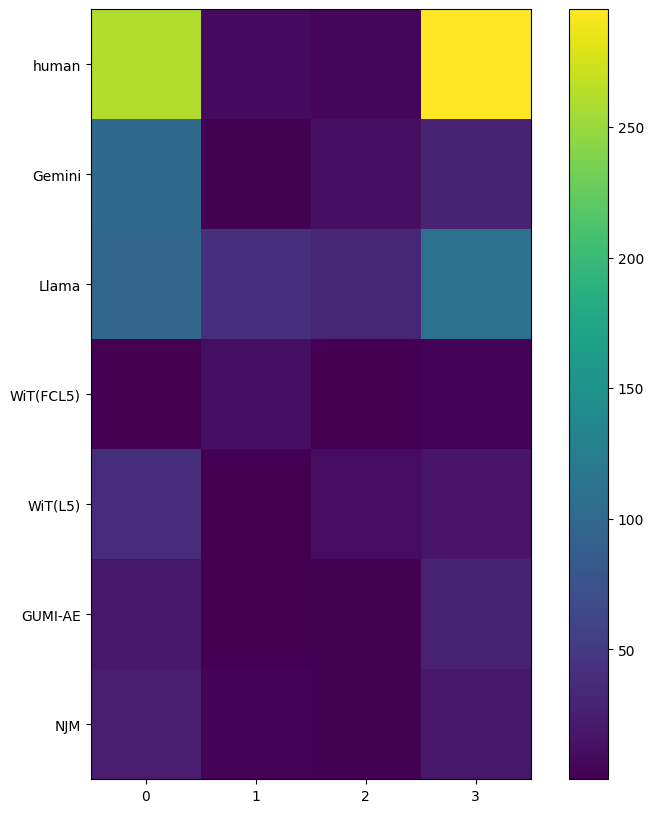

In [3]:
methods = [
    "human",
    "Gemini",
    "Llama",
    "WiT(FCL5)",
    "WiT(L5)",
    "GUMI-AE",
    "NJM"
]
method_to_vote = {
    M: [0] * 4 for M in methods
}

for V in vote.values():
    if V["method"] not in methods: continue
    method_to_vote[V["method"]][V["rate"]] += 1

votes = np.array([V for V in method_to_vote.values()])
chi2_obs, p, df, E = chi2_contingency(votes)
S = votes.sum()
N, M = votes.shape
V = np.sqrt(chi2_obs / (S * min(N - 1, M - 1)))

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot()
im = plt.imshow( (votes - E) ** 2 )
plt.colorbar(im)

plt.xticks(range(votes.shape[1]), [0, 1, 2, 3])
plt.yticks(range(votes.shape[0]), list(method_to_vote.keys()))

p, np.sum(E < 15), V, np.min(E)

(172, 0.6645579244112885, 2, 0.09576058520879593, 12.209302325581396)

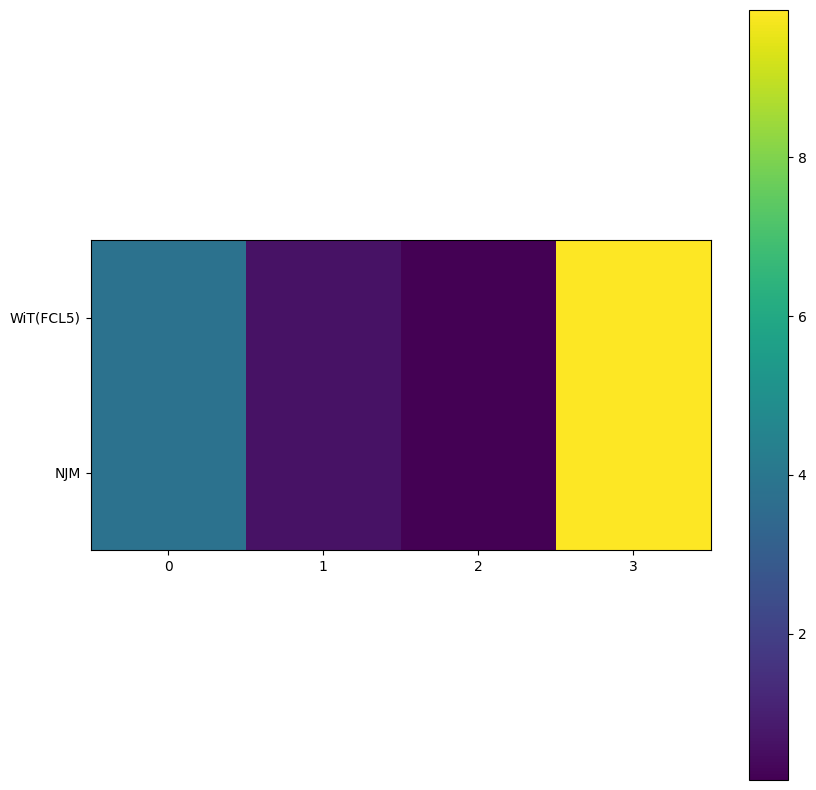

In [19]:
methods = [
    # "human",
    # "Gemini",
    # "Llama",
    "WiT(FCL5)",
    # "WiT(L5)",
    # "GUMI-AE",
    "NJM"
]
method_to_vote = {
    M: [0] * 4 for M in methods
}

for V in vote.values():
    if V["method"] not in methods: continue
    method_to_vote[V["method"]][V["rate"]] += 1

votes = np.array([V for V in method_to_vote.values()])
chi2_obs, p, df, E = chi2_contingency(votes)
S = votes.sum()
N, M = votes.shape
V = np.sqrt(chi2_obs / (S * min(N - 1, M - 1)))

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot()
im = plt.imshow( (votes - E) ** 2 )
plt.colorbar(im)

plt.xticks(range(votes.shape[1]), [0, 1, 2, 3])
plt.yticks(range(votes.shape[0]), list(method_to_vote.keys()))

sum([sum(V) for V in method_to_vote.values()]), p, np.sum(E < 15), V, np.min(E)